# Solving CIFAR 10 using Keras (Work in progress)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

This notebook attempts to classify those images.

In [7]:
# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [8]:
#Declaring Variables
batch_size = 32 #Smaller Batch size means more updates in one epoch

num_classes = 10 
epochs = 100 #Repeat 100 times

In [26]:
#Load the Dataset 
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

class_names = [
    'airplane', 
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

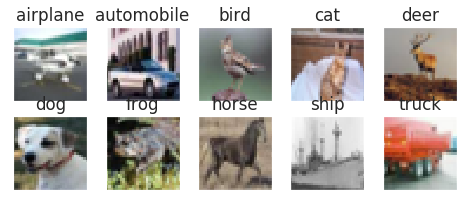

In [27]:
# Print 10 random images 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2,5,1 + i, xticks=[],yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

We now need to normalize the pixel values. This means to turn them from in the range of 0-255 to be between 0 and 1. 

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Making a model

In [14]:
#Architecture from: https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
import keras
from keras import regularizers

def model():
    weight_decay = 1e-4
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
    return model
cnn = model() 
cnn.summary()
 
# Fit model
cnn4 = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 16, 16)        0         
__________

50000/50000 [==============================] - 36s 724us/step - loss: 0.5493 - acc: 0.8879 - val_loss: 0.7035 - val_acc: 0.8434
Epoch 33/100
50000/50000 [==============================] - 36s 724us/step - loss: 0.5516 - acc: 0.8861 - val_loss: 0.7232 - val_acc: 0.8378
Epoch 34/100
50000/50000 [==============================] - 36s 724us/step - loss: 0.5470 - acc: 0.8884 - val_loss: 0.7066 - val_acc: 0.8443
Epoch 35/100
50000/50000 [==============================] - 36s 724us/step - loss: 0.5446 - acc: 0.8900 - val_loss: 0.7057 - val_acc: 0.8427
Epoch 36/100
50000/50000 [==============================] - 36s 723us/step - loss: 0.5408 - acc: 0.8909 - val_loss: 0.7097 - val_acc: 0.8428
Epoch 37/100
50000/50000 [==============================] - 36s 720us/step - loss: 0.5423 - acc: 0.8904 - val_loss: 0.7150 - val_acc: 0.8389
Epoch 38/100
50000/50000 [==============================] - 36s 722us/step - loss: 0.5445 - acc: 0.8911 - val_loss: 0.7166 - val_acc: 0.8434
Epoch 39/100
50000/50000 [

50000/50000 [==============================] - 36s 719us/step - loss: 0.4839 - acc: 0.9141 - val_loss: 0.6950 - val_acc: 0.8580
Epoch 91/100
50000/50000 [==============================] - 36s 720us/step - loss: 0.4824 - acc: 0.9140 - val_loss: 0.6996 - val_acc: 0.8570
Epoch 92/100
50000/50000 [==============================] - 36s 718us/step - loss: 0.4802 - acc: 0.9146 - val_loss: 0.7135 - val_acc: 0.8510
Epoch 93/100
50000/50000 [==============================] - 36s 720us/step - loss: 0.4766 - acc: 0.9167 - val_loss: 0.7099 - val_acc: 0.8555
Epoch 94/100
50000/50000 [==============================] - 36s 719us/step - loss: 0.4758 - acc: 0.9155 - val_loss: 0.6854 - val_acc: 0.8571
Epoch 95/100
50000/50000 [==============================] - 36s 720us/step - loss: 0.4811 - acc: 0.9155 - val_loss: 0.6751 - val_acc: 0.8598
Epoch 96/100
50000/50000 [==============================] - 36s 719us/step - loss: 0.4705 - acc: 0.9175 - val_loss: 0.7144 - val_acc: 0.8500
Epoch 97/100
50000/50000 [

# Plotting our accuracy and loss

[]

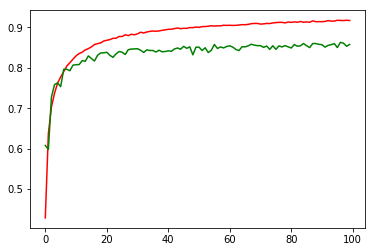

In [16]:
plt.figure(0)
plt.plot(cnn4.history['acc'],'r')
plt.plot(cnn4.history['val_acc'],'g')
plt.plot()

In [18]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.76%


# Confusion Matrix for our model

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]]


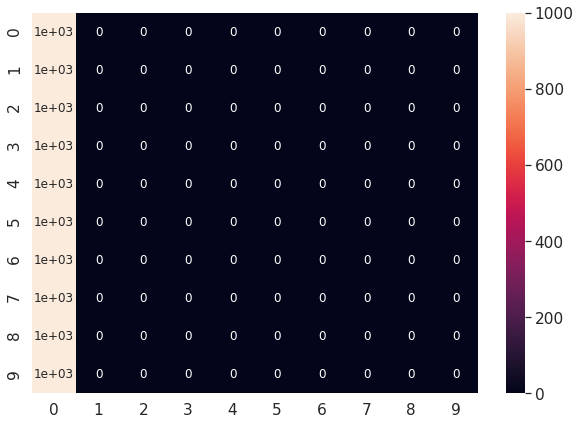

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd

df_cm = pd.DataFrame(cm, range(10),range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

# Saving our initial model to disk

In [23]:
#save to disk
model_json = cnn.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
cnn.save_weights('model.h5') 

# Using the model for prediction

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


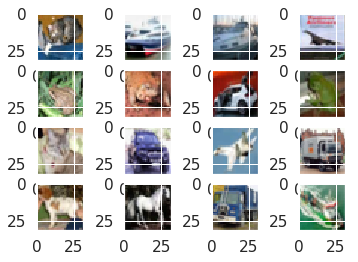

['dog', 'automobile', 'automobile', 'automobile', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'frog']


In [24]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.models import model_from_json

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
    
show_imgs(x_test[:16])
 
# Load trained CNN model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:16]),1)
print([labels[x] for x in indices])